In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore")


### 무지성 때려넣기

In [3]:
data1 = pd.read_excel("../Data/NoScale.xlsx").iloc[:, 1:]
unique = data1[["경주일자",	"경주번호"]].drop_duplicates()
unique = unique.reset_index()
data1["key"]=0
for i in range(len(unique)):
    data1.loc[(data1["경주일자"]==unique["경주일자"][i])&(data1["경주번호"]==unique["경주번호"][i]), "key"] = i
data1["착순"] = data1["착순"]-1
pd.set_option('display.max_columns', None)
data1 = data1.drop(columns=["풍향(16방위)", "서울,제주S1F구간통과순위(서울,제주공통)",	"서울,제주1코너구간통과순위(서울,제주공통)",	"서울,제주2코너구간통과순위(서울,제주공통)",	"서울,제주3코너구간통과순위(서울,제주공통)",	"서울,제주4코너구간통과순위(서울,제주공통)",	"서울,제주G1F구간통과순위(서울,제주공통)",	"제주S-1F통과기록",	"제주1코너통과기록",	"제주2코너통과기록",	"제주3코너통과기록",	"제주G-3F통과기록",	"제주G-1F통과기록", "제주4코너통과기록"])
data1

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,key
0,20230624,1,800,0,1,2,-1,68.1,2,2,54.0,12,27,10781,350,442,250,11,0.500000,0.000000,0.5,0.000000,0.135450,0.120868,0.124105,0.138425,0.094704,0.102217,0.117143,0.142857,0.115385,0.115385,4,1,6.0,0,0.62,0.28,13.0,22.0,21.0,78.0,27.9,0.0,4.8,56,0.0,46.2,26.275,0
1,20230624,1,800,1,4,3,1,68.5,4,4,53.0,3,19,7980,381,705,311,-17,0.000000,0.250000,0.0,0.250000,0.067308,0.084615,0.076555,0.100478,0.116165,0.117293,0.102362,0.091864,0.123404,0.109220,4,1,6.0,0,0.60,NaN,18.0,NaN,30.0,NaN,27.9,0.0,4.8,56,0.0,46.2,26.275,0
2,20230624,1,800,2,9,2,0,68.5,2,2,55.0,6,12,4705,343,420,270,3,0.000000,0.000000,0.0,0.000000,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.195238,0.116667,4,1,6.0,0,0.83,NaN,5.0,NaN,6.0,NaN,27.9,0.0,4.8,56,0.0,46.2,26.275,0
3,20230624,1,800,3,3,3,0,68.6,2,2,56.0,18,13,5448,445,943,301,7,0.000000,0.500000,0.0,0.500000,0.156444,0.132137,0.158986,0.124424,0.122981,0.122430,0.141573,0.110112,0.130435,0.119830,4,1,6.0,0,0.34,0.34,22.0,10.0,65.0,29.0,27.9,0.0,4.8,56,0.0,46.2,26.275,0
4,20230624,1,800,4,8,3,0,69.0,9,9,55.0,13,19,7231,367,711,265,0,0.000000,0.111111,0.0,0.111111,0.093869,0.099154,0.064677,0.074627,0.099710,0.098050,0.073569,0.108992,0.078762,0.123769,4,1,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,27.9,0.0,4.8,56,0.0,46.2,26.275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,5,8,3,1,64.1,15,0,54.5,10,19,7980,381,1561,308,5,0.133333,0.200000,0.0,0.000000,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,64,0.0,12.0,7.875,2867
28679,20190111,9,900,6,3,4,1,64.2,8,0,57.0,18,17,6512,432,1151,311,-2,0.000000,0.000000,0.0,0.000000,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,64,0.0,12.0,7.875,2867
28680,20190111,9,900,7,1,3,1,64.5,19,0,53.0,26,27,10781,350,1174,282,-4,0.105263,0.105263,0.0,0.000000,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,64,0.0,12.0,7.875,2867
28681,20190111,9,900,8,4,4,1,64.6,26,0,54.0,31,32,13727,360,1027,316,4,0.000000,0.076923,0.0,0.000000,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,64,0.0,12.0,7.875,2867


In [541]:
from xgboost import XGBRegressor
X_train = data1[data1["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
X_test = data1[data1["경주일자"]>=20220701].drop(["경주기록(초)", "착순", "key"], axis=1) 
y_train = data1[data1["경주일자"]<20220701]["경주기록(초)"]
y_test = data1[data1["경주일자"]>=20220701]["경주기록(초)"]
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

pred_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"].reset_index(drop=True), pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"].reset_index(drop=True), pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.2180232558139535

In [542]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X_train = data1[data1["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
X_test = data1[data1["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
y_train = data1[data1["경주일자"]<20220701]["착순"]
y_test = data1[data1["경주일자"]>=20220701]["착순"]

params = {
    'objective':"multi:softmax", 
    'num_class':data1["착순"].nunique(),
    'max_depth':5,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_class = XGBClassifier(params = params)
xgb_class.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_class.predict_proba(X_test)@np.array((0,1,2,3,4,5,6,7,8,9,10,11,12))

pred_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.2936046511627907

### 무지성 정규화

In [555]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [557]:
scaled_data = scaler.fit_transform(data1.drop(["경주기록(초)","착순", "key"], axis=1))

In [558]:
scaled_data = scaler.fit_transform(data1.drop(["경주기록(초)","착순", "key"], axis=1))
X_train = scaled_data[6939:]
X_test = scaled_data[:6939]
y_train = data1[6939:]["경주기록(초)"]
y_test = data1[:6939]["경주기록(초)"]
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

pred_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"].reset_index(drop=True), pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"].reset_index(drop=True), pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.2543604651162791

In [559]:
X_train = scaled_data[6939:]
X_test = scaled_data[:6939]
y_train = data1[6939:]["착순"]
y_test = data1[:6939]["착순"]

params = {
    'objective':"multi:softmax", 
    'num_class':data1["착순"].nunique(),
    'max_depth':5,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_class = XGBClassifier(params = params)
xgb_class.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_class.predict_proba(X_test)@np.array((0,1,2,3,4,5,6,7,8,9,10,11,12))

pred_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.2877906976744186

### 모델 선택

In [543]:
datafil1 = data1.fillna(0)

##### Random Forest

In [544]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
X_train = datafil1[datafil1["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
X_test = datafil1[datafil1["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
y_train = datafil1[datafil1["경주일자"]<20220701]["착순"]
y_test = datafil1[datafil1["경주일자"]>=20220701]["착순"]
clf=RandomForestClassifier().fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict_proba(X_test)@np.array((0,1,2,3,4,5,6,7,8,9,10,11,12))

pred_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([data1[data1["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.30377906976744184

In [545]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
X_train = datafil1[datafil1["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
X_test = datafil1[datafil1["경주일자"]>=20220701].drop(["경주기록(초)", "착순", "key"], axis=1) 
y_train = datafil1[datafil1["경주일자"]<20220701]["경주기록(초)"]
y_test = datafil1[datafil1["경주일자"]>=20220701]["경주기록(초)"]
clf=RandomForestRegressor().fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

pred_key = pd.concat([datafil1[datafil1["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([datafil1[datafil1["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.2543604651162791

##### Linear Regression

In [546]:
from sklearn.linear_model import LinearRegression
X_train = datafil1[datafil1["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
X_test = datafil1[datafil1["경주일자"]>=20220701].drop(["경주기록(초)", "착순", "key"], axis=1) 
y_train = datafil1[datafil1["경주일자"]<20220701]["경주기록(초)"]
y_test = datafil1[datafil1["경주일자"]>=20220701]["경주기록(초)"]
clf=RandomForestRegressor().fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

pred_key = pd.concat([datafil1[datafil1["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([datafil1[datafil1["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.24127906976744187

In [547]:
from sklearn.linear_model import LogisticRegression
X_train = datafil1[datafil1["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
X_test = datafil1[datafil1["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
y_train = datafil1[datafil1["경주일자"]<20220701]["착순"]
y_test = datafil1[datafil1["경주일자"]>=20220701]["착순"]
logistic = LogisticRegression()

logistic.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic.predict_proba(X_test)@np.array((0,1,2,3,4,5,6,7,8,9,10,11,12))

pred_key = pd.concat([datafil1[datafil1["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([datafil1[datafil1["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.11773255813953488

In [548]:
data1["경주거리"].unique()

array([ 800, 1000, 1110, 1400,  900, 1200, 1700, 1800, 1610])

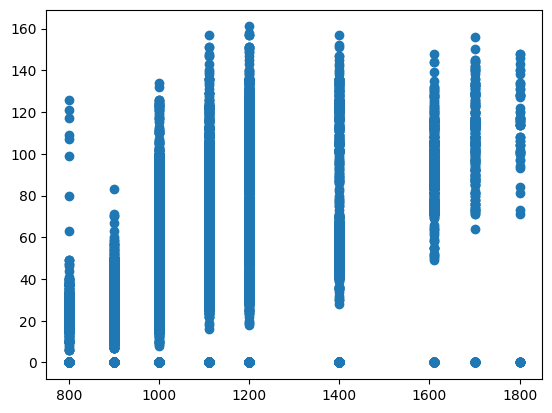

In [549]:
plt.scatter(data1["경주거리"], data1["레이팅"])

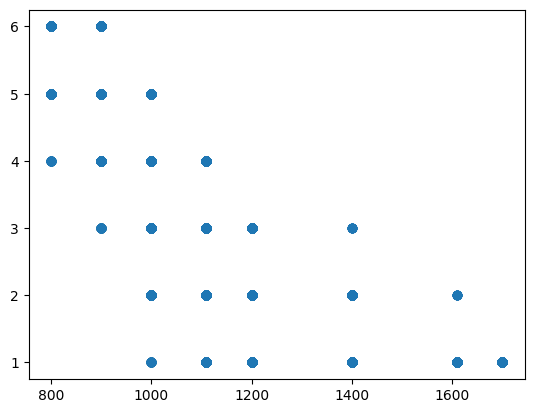

In [550]:
plt.scatter(data1["경주거리"], data1["등급"])

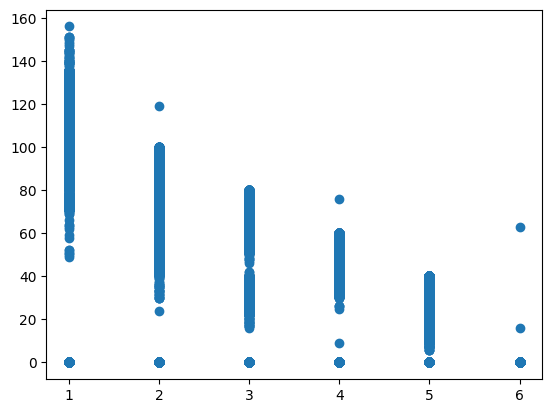

In [551]:
plt.scatter(data1["등급"], data1["레이팅"])

### 미터별로 나눠서 모델링 성능 더 좋음????

In [560]:
data1 = pd.read_excel("../Data/NoScale.xlsx").iloc[:, 1:]
unique = data1[["경주일자",	"경주번호"]].drop_duplicates()
unique = unique.reset_index()
data1["key"]=0
for i in range(len(unique)):
    data1.loc[(data1["경주일자"]==unique["경주일자"][i])&(data1["경주번호"]==unique["경주번호"][i]), "key"] = i
data1["착순"] = data1["착순"]-1
pd.set_option('display.max_columns', None)
data1 = data1.drop(columns=["서울,제주S1F구간통과순위(서울,제주공통)",	"서울,제주1코너구간통과순위(서울,제주공통)",	"서울,제주2코너구간통과순위(서울,제주공통)",	"서울,제주3코너구간통과순위(서울,제주공통)",	"서울,제주4코너구간통과순위(서울,제주공통)",	"서울,제주G1F구간통과순위(서울,제주공통)",	"제주S-1F통과기록",	"제주1코너통과기록",	"제주2코너통과기록",	"제주3코너통과기록",	"제주G-3F통과기록",	"제주G-1F통과기록"])
data1

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,제주4코너통과기록,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,key
0,20230624,1,800,0,1,2,-1,68.1,2,2,54.0,12,27,10781,350,442,34.4,250,11,0.500000,0.000000,0.5,0.000000,0.135450,0.120868,0.124105,0.138425,0.094704,0.102217,0.117143,0.142857,0.115385,0.115385,4,1,6.0,0,0.62,0.28,13.0,22.0,21.0,78.0,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
1,20230624,1,800,1,4,3,1,68.5,4,4,53.0,3,19,7980,381,705,34.1,311,-17,0.000000,0.250000,0.0,0.250000,0.067308,0.084615,0.076555,0.100478,0.116165,0.117293,0.102362,0.091864,0.123404,0.109220,4,1,6.0,0,0.60,NaN,18.0,NaN,30.0,NaN,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
2,20230624,1,800,2,9,2,0,68.5,2,2,55.0,6,12,4705,343,420,34.6,270,3,0.000000,0.000000,0.0,0.000000,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.195238,0.116667,4,1,6.0,0,0.83,NaN,5.0,NaN,6.0,NaN,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
3,20230624,1,800,3,3,3,0,68.6,2,2,56.0,18,13,5448,445,943,33.9,301,7,0.000000,0.500000,0.0,0.500000,0.156444,0.132137,0.158986,0.124424,0.122981,0.122430,0.141573,0.110112,0.130435,0.119830,4,1,6.0,0,0.34,0.34,22.0,10.0,65.0,29.0,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
4,20230624,1,800,4,8,3,0,69.0,9,9,55.0,13,19,7231,367,711,34.8,265,0,0.000000,0.111111,0.0,0.111111,0.093869,0.099154,0.064677,0.074627,0.099710,0.098050,0.073569,0.108992,0.078762,0.123769,4,1,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,5,8,3,1,64.1,15,0,54.5,10,19,7980,381,1561,34.9,308,5,0.133333,0.200000,0.0,0.000000,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867
28679,20190111,9,900,6,3,4,1,64.2,8,0,57.0,18,17,6512,432,1151,35.2,311,-2,0.000000,0.000000,0.0,0.000000,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867
28680,20190111,9,900,7,1,3,1,64.5,19,0,53.0,26,27,10781,350,1174,35.6,282,-4,0.105263,0.105263,0.0,0.000000,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867
28681,20190111,9,900,8,4,4,1,64.6,26,0,54.0,31,32,13727,360,1027,35.9,316,4,0.000000,0.076923,0.0,0.000000,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867


In [561]:
data_1200=data1[data1['경주거리']==1200].reset_index(drop=True);
data_800=data1[data1['경주거리']==800].reset_index(drop=True)
data_900=data1[data1['경주거리']==900].reset_index(drop=True);
data_1000=data1[data1['경주거리']==1000].reset_index(drop=True);
data_1110=data1[data1['경주거리']==1110].reset_index(drop=True);
data_1400=data1[data1['경주거리']==1400].reset_index(drop=True);
data_1610=data1[data1['경주거리']==1610].reset_index(drop=True)
data_1700=data1[data1['경주거리']==1700].reset_index(drop=True)
data_1800=data1[data1['경주거리']==1800].reset_index(drop=True)
data_list = [data_800, data_900, data_1000, data_1110, data_1200, data_1400, data_1610, data_1700, data_1800 ]

In [562]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score


def customXgbRegressor(data_list):
    accuracy_list = []
    length_list= []
    for data in data_list:
        X_train = data[data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
        X_test = data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순", "key"], axis=1) 
        y_train = data[data["경주일자"]<20220701]["경주기록(초)"]
        y_test = data[data["경주일자"]>=20220701]["경주기록(초)"]
        xgb_reg = XGBRegressor()
        xgb_reg.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_reg.predict(X_test)

        pred_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
        pred_key.columns=["key",	"y_pred"]

        true_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
        true_key.columns=["key",	"y_test"]

        pred_key["in5"] = 0
        for i in pred_key["key"].unique():
            index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
            pred_key.loc[index,"in5"]=1

        true_key["in3"] = 0
        for i in true_key["key"].unique():
            index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
            true_key.loc[index,"in3"]=1

        count = 0
        for key in true_key["key"].unique():
            num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
            if num==3:
                count+=1
        
        length_list.append(len(true_key["key"].unique()))
        accuracy_list.append(count/len(true_key["key"].unique()))
    
    return(length_list, accuracy_list)


reg_length, reg_accuracy  =  customXgbRegressor(data_list)
# 최종 accuracy
np.array(reg_length)@np.array(reg_accuracy)/sum(reg_length)

In [564]:
from xgboost import XGBClassifier
def customXgbClassifier(data_list):
    accuracy_list = []
    length_list= []
    for data in data_list:
        X_train = data[data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
        X_test = data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
        y_train = data[data["경주일자"]<20220701]["착순"]
        y_test = data[data["경주일자"]>=20220701]["착순"]
        params = {
        'objective':"multi:softmax", 
        'num_class':data["착순"].nunique(),
        'max_depth':5,
        'learning_rate': 0.1,
        'n_estimators': 100
        }
        xgb_class = XGBClassifier(params = params)
        xgb_class.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_class.predict_proba(X_test)@np.array(range(data["착순"].nunique()))

        pred_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
        pred_key.columns=["key",	"y_pred"]

        true_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
        true_key.columns=["key",	"y_test"]

        pred_key["in5"] = 0
        for i in pred_key["key"].unique():
            index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
            pred_key.loc[index,"in5"]=1

        true_key["in3"] = 0
        for i in true_key["key"].unique():
            index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
            true_key.loc[index,"in3"]=1

        count = 0
        for key in true_key["key"].unique():
            num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
            if num==3:
                count+=1

        count/len(true_key["key"].unique())
        
        length_list.append(len(true_key["key"].unique()))
        accuracy_list.append(count/len(true_key["key"].unique()))
    
    return(length_list, accuracy_list)


clf_length, clf_accuracy  =  customXgbClassifier(data_list)
# 최종 accuracy
np.array(clf_length)@np.array(clf_accuracy)/sum(clf_length)

### Cluster label 추가하면 성능 올라감???

#### 먼저 cluster 예측

In [566]:
# 먼저 데이터에 cluster 0으로 채워주고
for data in data_list:
    data["cluster"]=0

In [567]:
bi_list = [data_900, data_1000, data_1110, data_1200, data_1400]
non_bilist = [data_800, data_1610, data_1700, data_1800 ]
k=2
model=KMeans(n_clusters=k)
for data in bi_list:
    data["cluster"]=model.fit_predict(data[["경주기록(초)"]])

    X_train = data[data["경주일자"]<20220701].drop(["경주기록(초)","cluster","착순"], axis=1)
    X_test = data[data["경주일자"]>=20220701].drop(["경주기록(초)","cluster", "착순"], axis=1) 
    y_train = data[data["경주일자"]<20220701]["cluster"]
    y_test = data[data["경주일자"]>=20220701]["cluster"]

    params = { 
        'num_class':2,
        'max_depth':5,
        'learning_rate': 0.1,
        'n_estimators': 100
    }
    xgb_class = XGBClassifier(params = params)
    xgb_class.fit(X_train, y_train)
    y_pred = xgb_class.predict(X_test)
    data[data["경주일자"]>=20220701]["cluster"] = y_pred


(array([ 2.,  0.,  4.,  3.,  5., 31., 40., 76., 65., 46., 62., 46., 32.,
        26., 16., 10., 11.,  3.,  5.,  2.,  0.,  2.,  1.,  3.,  1.,  5.,
         2.,  3.,  6.,  7.]),
 array([67.3 , 67.68, 68.06, 68.44, 68.82, 69.2 , 69.58, 69.96, 70.34,
        70.72, 71.1 , 71.48, 71.86, 72.24, 72.62, 73.  , 73.38, 73.76,
        74.14, 74.52, 74.9 , 75.28, 75.66, 76.04, 76.42, 76.8 , 77.18,
        77.56, 77.94, 78.32, 78.7 ]),
 <BarContainer object of 30 artists>)

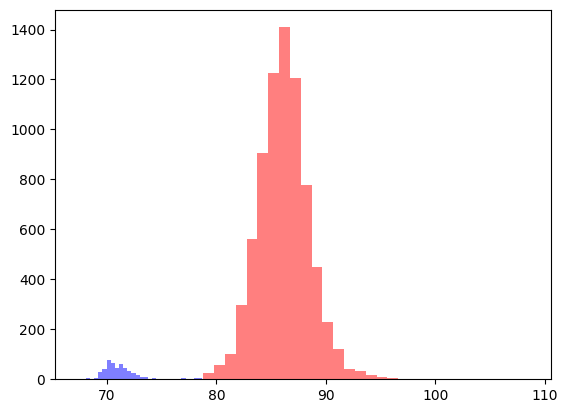

In [568]:
# data 확인
plt.hist(data_1000[data_1000['cluster']==0]['경주기록(초)'], bins=30, alpha=0.5, color="r")
plt.hist(data_1000[data_1000['cluster']==1]['경주기록(초)'], bins =30, alpha=0.5, color="b")

#### cluster 변수 넣어서 모델 학습(Regression)

In [569]:
def customXgbRegressor(non_bilist, bi_list):
    accuracy_list = []
    length_list= []
    for data in bi_list:
        X_train = data[data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
        X_test = data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
        y_train = data[data["경주일자"]<20220701]["경주기록(초)"]
        y_test = data[data["경주일자"]>=20220701]["경주기록(초)"]
        xgb_reg = XGBRegressor()
        xgb_reg.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_reg.predict(X_test)

        pred_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
        pred_key.columns=["key",	"y_pred"]

        true_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
        true_key.columns=["key",	"y_test"]

        pred_key["in5"] = 0
        for i in pred_key["key"].unique():
            index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
            pred_key.loc[index,"in5"]=1

        true_key["in3"] = 0
        for i in true_key["key"].unique():
            index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
            true_key.loc[index,"in3"]=1

        count = 0
        for key in true_key["key"].unique():
            num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
            if num==3:
                count+=1
        
        length_list.append(len(true_key["key"].unique()))
        accuracy_list.append(count/len(true_key["key"].unique()))
    
    for data in non_bilist:
        X_train = data[data["경주일자"]<20220701].drop(["경주기록(초)","착순","cluster", "key"], axis=1)
        X_test = data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순", "cluster","key"], axis=1) 
        y_train = data[data["경주일자"]<20220701]["경주기록(초)"]
        y_test = data[data["경주일자"]>=20220701]["경주기록(초)"]
        xgb_reg = XGBRegressor()
        xgb_reg.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_reg.predict(X_test)

        pred_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
        pred_key.columns=["key",	"y_pred"]

        true_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
        true_key.columns=["key",	"y_test"]

        pred_key["in5"] = 0
        for i in pred_key["key"].unique():
            index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
            pred_key.loc[index,"in5"]=1

        true_key["in3"] = 0
        for i in true_key["key"].unique():
            index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
            true_key.loc[index,"in3"]=1

        count = 0
        for key in true_key["key"].unique():
            num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
            if num==3:
                count+=1
        
        length_list.append(len(true_key["key"].unique()))
        accuracy_list.append(count/len(true_key["key"].unique()))

    return(length_list, accuracy_list)


reg_length, reg_accuracy  =  customXgbRegressor(non_bilist, bi_list)
np.array(reg_length)@np.array(reg_accuracy)/sum(reg_length)


0.2863372093023256

In [572]:
def customXgbClassifier(non_bilist, bi_list):
    accuracy_list = []
    length_list= []
    for data in bi_list:
        X_train = data[data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
        X_test = data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
        y_train = data[data["경주일자"]<20220701]["착순"]
        y_test = data[data["경주일자"]>=20220701]["착순"]
        params = {
        'objective':"multi:softmax", 
        'num_class':data["착순"].nunique(),
        'max_depth':5,
        'learning_rate': 0.1,
        'n_estimators': 100
        }
        xgb_class = XGBClassifier(params = params)
        xgb_class.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_class.predict_proba(X_test)@np.array(range(data["착순"].nunique()))

        pred_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
        pred_key.columns=["key",	"y_pred"]

        true_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
        true_key.columns=["key",	"y_test"]

        pred_key["in5"] = 0
        for i in pred_key["key"].unique():
            index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
            pred_key.loc[index,"in5"]=1

        true_key["in3"] = 0
        for i in true_key["key"].unique():
            index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
            true_key.loc[index,"in3"]=1

        count = 0
        for key in true_key["key"].unique():
            num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
            if num==3:
                count+=1

        count/len(true_key["key"].unique())
        
        length_list.append(len(true_key["key"].unique()))
        accuracy_list.append(count/len(true_key["key"].unique()))

    for data in non_bilist:
        X_train = data[data["경주일자"]<20220701].drop(["경주기록(초)","착순","cluster", "key"], axis=1)
        X_test = data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순", "cluster","key"], axis=1) 
        y_train = data[data["경주일자"]<20220701]["착순"]
        y_test = data[data["경주일자"]>=20220701]["착순"]
        params = {
        'objective':"multi:softmax", 
        'num_class':data["착순"].nunique(),
        'max_depth':5,
        'learning_rate': 0.1,
        'n_estimators': 100
        }
        xgb_class = XGBClassifier(params = params)
        xgb_class.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_class.predict_proba(X_test)@np.array(range(data["착순"].nunique()))

        pred_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
        pred_key.columns=["key",	"y_pred"]

        true_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
        true_key.columns=["key",	"y_test"]

        pred_key["in5"] = 0
        for i in pred_key["key"].unique():
            index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
            pred_key.loc[index,"in5"]=1

        true_key["in3"] = 0
        for i in true_key["key"].unique():
            index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
            true_key.loc[index,"in3"]=1

        count = 0
        for key in true_key["key"].unique():
            num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
            if num==3:
                count+=1

        count/len(true_key["key"].unique())
        
        length_list.append(len(true_key["key"].unique()))
        accuracy_list.append(count/len(true_key["key"].unique()))

    return(length_list, accuracy_list)


clf_length, clf_accuracy  =  customXgbClassifier(non_bilist, bi_list)
np.array(clf_length)@np.array(clf_accuracy)/sum(clf_length)

0.3125

### 등급 imputation하면 성능 올라감??

In [583]:
data1 = pd.read_excel("../Data/NoScale.xlsx").iloc[:, 1:]
unique = data1[["경주일자",	"경주번호"]].drop_duplicates()
unique = unique.reset_index()
data1["key"]=0
for i in range(len(unique)):
    data1.loc[(data1["경주일자"]==unique["경주일자"][i])&(data1["경주번호"]==unique["경주번호"][i]), "key"] = i
data1["착순"] = data1["착순"]-1
pd.set_option('display.max_columns', None)
data1 = data1.drop(columns=["서울,제주S1F구간통과순위(서울,제주공통)",	"서울,제주1코너구간통과순위(서울,제주공통)",	"서울,제주2코너구간통과순위(서울,제주공통)",	"서울,제주3코너구간통과순위(서울,제주공통)",	"서울,제주4코너구간통과순위(서울,제주공통)",	"서울,제주G1F구간통과순위(서울,제주공통)",	"제주S-1F통과기록",	"제주1코너통과기록",	"제주2코너통과기록",	"제주3코너통과기록",	"제주G-3F통과기록",	"제주G-1F통과기록"])
data1

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,제주4코너통과기록,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,key
0,20230624,1,800,0,1,2,-1,68.1,2,2,54.0,12,27,10781,350,442,34.4,250,11,0.500000,0.000000,0.5,0.000000,0.135450,0.120868,0.124105,0.138425,0.094704,0.102217,0.117143,0.142857,0.115385,0.115385,4,1,6.0,0,0.62,0.28,13.0,22.0,21.0,78.0,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
1,20230624,1,800,1,4,3,1,68.5,4,4,53.0,3,19,7980,381,705,34.1,311,-17,0.000000,0.250000,0.0,0.250000,0.067308,0.084615,0.076555,0.100478,0.116165,0.117293,0.102362,0.091864,0.123404,0.109220,4,1,6.0,0,0.60,NaN,18.0,NaN,30.0,NaN,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
2,20230624,1,800,2,9,2,0,68.5,2,2,55.0,6,12,4705,343,420,34.6,270,3,0.000000,0.000000,0.0,0.000000,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.195238,0.116667,4,1,6.0,0,0.83,NaN,5.0,NaN,6.0,NaN,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
3,20230624,1,800,3,3,3,0,68.6,2,2,56.0,18,13,5448,445,943,33.9,301,7,0.000000,0.500000,0.0,0.500000,0.156444,0.132137,0.158986,0.124424,0.122981,0.122430,0.141573,0.110112,0.130435,0.119830,4,1,6.0,0,0.34,0.34,22.0,10.0,65.0,29.0,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
4,20230624,1,800,4,8,3,0,69.0,9,9,55.0,13,19,7231,367,711,34.8,265,0,0.000000,0.111111,0.0,0.111111,0.093869,0.099154,0.064677,0.074627,0.099710,0.098050,0.073569,0.108992,0.078762,0.123769,4,1,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,27.9,0.0,4.8,110,56,0.0,46.2,26.275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,5,8,3,1,64.1,15,0,54.5,10,19,7980,381,1561,34.9,308,5,0.133333,0.200000,0.0,0.000000,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867
28679,20190111,9,900,6,3,4,1,64.2,8,0,57.0,18,17,6512,432,1151,35.2,311,-2,0.000000,0.000000,0.0,0.000000,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867
28680,20190111,9,900,7,1,3,1,64.5,19,0,53.0,26,27,10781,350,1174,35.6,282,-4,0.105263,0.105263,0.0,0.000000,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867
28681,20190111,9,900,8,4,4,1,64.6,26,0,54.0,31,32,13727,360,1027,35.9,316,4,0.000000,0.076923,0.0,0.000000,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,270,64,0.0,12.0,7.875,2867


In [584]:
data_1200=data1[data1['경주거리']==1200].reset_index(drop=True);
data_800=data1[data1['경주거리']==800].reset_index(drop=True)
data_900=data1[data1['경주거리']==900].reset_index(drop=True);
data_1000=data1[data1['경주거리']==1000].reset_index(drop=True);
data_1110=data1[data1['경주거리']==1110].reset_index(drop=True);
data_1400=data1[data1['경주거리']==1400].reset_index(drop=True);
data_1610=data1[data1['경주거리']==1610].reset_index(drop=True)
data_1700=data1[data1['경주거리']==1700].reset_index(drop=True)
data_1800=data1[data1['경주거리']==1800].reset_index(drop=True)
data_list = [data_800, data_900, data_1000, data_1110, data_1200, data_1400, data_1610, data_1700, data_1800 ]

In [585]:
for data in data_list[:-1]:
    # 등급이 없는 경기 확인
    mis_grade_key = data[data["등급"].isna()]["key"].unique()
    rest_data = data[data["경주일자"]<20220701][~data["key"].isin(mis_grade_key)]
    mean_data = rest_data.groupby("key").mean()["경주기록(초)"]
    for key in mis_grade_key:
        # print(mean_data)
        mean = data[data["key"]==key]["경주기록(초)"].mean()
        impute_key = np.abs(mean_data-mean).idxmin()
        impute_value = data[data["key"]==impute_key]["등급"].mean()
        data.loc[data["key"]==key,"등급"] = impute_value

#### 미터별로 모델 학습 후 확인

In [586]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score


def customXgbRegressor(data_list):
    accuracy_list = []
    length_list= []
    for data in data_list:
        X_train = data[data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
        X_test = data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순", "key"], axis=1) 
        y_train = data[data["경주일자"]<20220701]["경주기록(초)"]
        y_test = data[data["경주일자"]>=20220701]["경주기록(초)"]
        xgb_reg = XGBRegressor()
        xgb_reg.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_reg.predict(X_test)

        pred_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
        pred_key.columns=["key",	"y_pred"]

        true_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
        true_key.columns=["key",	"y_test"]

        pred_key["in5"] = 0
        for i in pred_key["key"].unique():
            index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
            pred_key.loc[index,"in5"]=1

        true_key["in3"] = 0
        for i in true_key["key"].unique():
            index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
            true_key.loc[index,"in3"]=1

        count = 0
        for key in true_key["key"].unique():
            num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
            if num==3:
                count+=1
        
        length_list.append(len(true_key["key"].unique()))
        accuracy_list.append(count/len(true_key["key"].unique()))
    
    return(length_list, accuracy_list)


reg_length, reg_accuracy  =  customXgbRegressor(data_list)

In [587]:
# 최종 accuracy
np.array(reg_length)@np.array(reg_accuracy)/sum(reg_length)

0.27761627906976744

In [588]:
from xgboost import XGBClassifier


def customXgbClassifier(data_list):
    accuracy_list = []
    length_list= []
    for data in data_list:
        X_train = data[data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
        X_test = data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
        y_train = data[data["경주일자"]<20220701]["착순"]
        y_test = data[data["경주일자"]>=20220701]["착순"]
        params = {
        'objective':"multi:softmax", 
        'num_class':data["착순"].nunique(),
        'max_depth':5,
        'learning_rate': 0.1,
        'n_estimators': 100
        }
        xgb_class = XGBClassifier(params = params)
        xgb_class.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_class.predict_proba(X_test)@np.array(range(data["착순"].nunique()))

        pred_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
        pred_key.columns=["key",	"y_pred"]

        true_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
        true_key.columns=["key",	"y_test"]

        pred_key["in5"] = 0
        for i in pred_key["key"].unique():
            index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
            pred_key.loc[index,"in5"]=1

        true_key["in3"] = 0
        for i in true_key["key"].unique():
            index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
            true_key.loc[index,"in3"]=1

        count = 0
        for key in true_key["key"].unique():
            num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
            if num==3:
                count+=1

        count/len(true_key["key"].unique())
        
        length_list.append(len(true_key["key"].unique()))
        accuracy_list.append(count/len(true_key["key"].unique()))
    
    return(length_list, accuracy_list)


clf_length, clf_accuracy  =  customXgbClassifier(data_list)

In [589]:
# 최종 accuracy
np.array(clf_length)@np.array(clf_accuracy)/sum(clf_length)

0.33430232558139533

#### 전체 한번에 학습

In [590]:
# data 합치기
concat_data = pd.concat(data_list).reset_index(drop=True)

In [591]:
X_train = concat_data[concat_data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
X_test = concat_data[concat_data["경주일자"]>=20220701].drop(["경주기록(초)", "착순", "key"], axis=1) 
y_train = concat_data[concat_data["경주일자"]<20220701]["경주기록(초)"]
y_test = concat_data[concat_data["경주일자"]>=20220701]["경주기록(초)"]
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

pred_key = pd.concat([concat_data[concat_data["경주일자"]>=20220701]["key"].reset_index(drop=True), pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([concat_data[concat_data["경주일자"]>=20220701]["key"].reset_index(drop=True), pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.30043541364296084

In [592]:
X_train = concat_data[concat_data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
X_test = concat_data[concat_data["경주일자"]>=20220701].drop(["경주기록(초)", "착순","key"], axis=1) 
y_train = concat_data[concat_data["경주일자"]<20220701]["착순"]
y_test = concat_data[concat_data["경주일자"]>=20220701]["착순"]

params = {
    'objective':"multi:softmax", 
    'num_class':concat_data["착순"].nunique(),
    'max_depth':5,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_class = XGBClassifier(params = params)
xgb_class.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_class.predict_proba(X_test)@np.array((0,1,2,3,4,5,6,7,8,9,10,11,12))

pred_key = pd.concat([concat_data[concat_data["경주일자"]>=20220701]["key"].reset_index(drop=True), pd.DataFrame(y_pred)], axis=1)
pred_key.columns=["key",	"y_pred"]

true_key = pd.concat([concat_data[concat_data["경주일자"]>=20220701]["key"].reset_index(drop=True), pd.DataFrame(y_test)], axis=1)
true_key.columns=["key",	"y_test"]

pred_key["in5"] = 0
for i in pred_key["key"].unique():
    index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
    pred_key.loc[index,"in5"]=1

true_key["in3"] = 0
for i in true_key["key"].unique():
    index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
    true_key.loc[index,"in3"]=1

count = 0
for key in true_key["key"].unique():
    num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
    if num==3:
        count+=1

count/len(true_key["key"].unique())

0.32075471698113206

### Variable selection

In [ ]:
data1 = pd.read_excel("../Data/NoScale.xlsx").iloc[:, 1:]
unique = data1[["경주일자",	"경주번호"]].drop_duplicates()
unique = unique.reset_index()
data1["key"]=0
for i in range(len(unique)):
    data1.loc[(data1["경주일자"]==unique["경주일자"][i])&(data1["경주번호"]==unique["경주번호"][i]), "key"] = i
data1["착순"] = data1["착순"]-1
pd.set_option('display.max_columns', None)
data1 = data1.drop(columns=["풍향(16방위)", "서울,제주S1F구간통과순위(서울,제주공통)",	"서울,제주1코너구간통과순위(서울,제주공통)",	"서울,제주2코너구간통과순위(서울,제주공통)",	"서울,제주3코너구간통과순위(서울,제주공통)",	"서울,제주4코너구간통과순위(서울,제주공통)",	"서울,제주G1F구간통과순위(서울,제주공통)",	"제주S-1F통과기록",	"제주1코너통과기록",	"제주2코너통과기록",	"제주3코너통과기록",	"제주G-3F통과기록",	"제주G-1F통과기록", "제주4코너통과기록"])
data1

,경주일자,경주번호,경주거리,착순,출주번호,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅,mom_rating,dad_rating,mom_total_in3,dad_total_in3,mom_total,dad_total,기온(°C),강수량(mm),풍속(m/s),습도(%),3시간신적설(cm),지면온도(°C),avg_temp,key
0,20230624,1,800,0,1,2,-1,68.1,2,2,54.0,12,27,10781,350,442,250,11,0.500000,0.000000,0.5,0.000000,0.135450,0.120868,0.124105,0.138425,0.094704,0.102217,0.117143,0.142857,0.115385,0.115385,4,1,6.0,0,0.62,0.28,13.0,22.0,21.0,78.0,27.9,0.0,4.8,56,0.0,46.2,26.275,0
1,20230624,1,800,1,4,3,1,68.5,4,4,53.0,3,19,7980,381,705,311,-17,0.000000,0.250000,0.0,0.250000,0.067308,0.084615,0.076555,0.100478,0.116165,0.117293,0.102362,0.091864,0.123404,0.109220,4,1,6.0,0,0.60,NaN,18.0,NaN,30.0,NaN,27.9,0.0,4.8,56,0.0,46.2,26.275,0
2,20230624,1,800,2,9,2,0,68.5,2,2,55.0,6,12,4705,343,420,270,3,0.000000,0.000000,0.0,0.000000,0.151738,0.123348,0.170455,0.125000,0.158980,0.127099,0.157434,0.107872,0.195238,0.116667,4,1,6.0,0,0.83,NaN,5.0,NaN,6.0,NaN,27.9,0.0,4.8,56,0.0,46.2,26.275,0
3,20230624,1,800,3,3,3,0,68.6,2,2,56.0,18,13,5448,445,943,301,7,0.000000,0.500000,0.0,0.500000,0.156444,0.132137,0.158986,0.124424,0.122981,0.122430,0.141573,0.110112,0.130435,0.119830,4,1,6.0,0,0.34,0.34,22.0,10.0,65.0,29.0,27.9,0.0,4.8,56,0.0,46.2,26.275,0
4,20230624,1,800,4,8,3,0,69.0,9,9,55.0,13,19,7231,367,711,265,0,0.000000,0.111111,0.0,0.111111,0.093869,0.099154,0.064677,0.074627,0.099710,0.098050,0.073569,0.108992,0.078762,0.123769,4,1,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,27.9,0.0,4.8,56,0.0,46.2,26.275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28678,20190111,9,900,5,8,3,1,64.1,15,0,54.5,10,19,7980,381,1561,308,5,0.133333,0.200000,0.0,0.000000,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,64,0.0,12.0,7.875,2867
28679,20190111,9,900,6,3,4,1,64.2,8,0,57.0,18,17,6512,432,1151,311,-2,0.000000,0.000000,0.0,0.000000,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,64,0.0,12.0,7.875,2867
28680,20190111,9,900,7,1,3,1,64.5,19,0,53.0,26,27,10781,350,1174,282,-4,0.105263,0.105263,0.0,0.000000,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,64,0.0,12.0,7.875,2867
28681,20190111,9,900,8,4,4,1,64.6,26,0,54.0,31,32,13727,360,1027,316,4,0.000000,0.076923,0.0,0.000000,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.0,1.9,64,0.0,12.0,7.875,2867


In [6]:
data_1200=data1[data1['경주거리']==1200].reset_index(drop=True);
data_800=data1[data1['경주거리']==800].reset_index(drop=True)
data_900=data1[data1['경주거리']==900].reset_index(drop=True);
data_1000=data1[data1['경주거리']==1000].reset_index(drop=True);
data_1110=data1[data1['경주거리']==1110].reset_index(drop=True);
data_1400=data1[data1['경주거리']==1400].reset_index(drop=True);
data_1610=data1[data1['경주거리']==1610].reset_index(drop=True)
data_1700=data1[data1['경주거리']==1700].reset_index(drop=True)
data_1800=data1[data1['경주거리']==1800].reset_index(drop=True)
data_list = [data_800, data_900, data_1000, data_1110, data_1200, data_1400, data_1610, data_1700, data_1800 ]

In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE



def customXgbRegressor(data_list):
    accuracy_list = []
    length_list= []
    for data in data_list:
        X_train = data[data["경주일자"]<20220701].drop(["경주기록(초)","착순", "key"], axis=1)
        X_test = data[data["경주일자"]>=20220701].drop(["경주기록(초)", "착순", "key"], axis=1) 
        y_train = data[data["경주일자"]<20220701]["경주기록(초)"]
        y_test = data[data["경주일자"]>=20220701]["경주기록(초)"]
        xgb_reg = XGBRegressor()
        
        # selector = RFE(xgb_reg, n_features_to_select=30)

        #selector = selector.fit(X_train, y_train)
        #print(X_train.columns[selector.support_])

        #X_train=X_train[X_train.columns[selector.support_]]
        #X_test=X_test[X_test.columns[selector.support_]]

        #xgb_reg.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = xgb_reg.predict(X_test)

        pred_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_pred)], axis=1)
        pred_key.columns=["key",	"y_pred"]

        true_key = pd.concat([data[data["경주일자"]>=20220701]["key"], pd.DataFrame(y_test)], axis=1)
        true_key.columns=["key",	"y_test"]

        pred_key["in5"] = 0
        for i in pred_key["key"].unique():
            index = pred_key[pred_key["key"]==i].sort_values(by="y_pred", ascending=True)[:5].index
            pred_key.loc[index,"in5"]=1

        true_key["in3"] = 0
        for i in true_key["key"].unique():
            index = true_key[true_key["key"]==i].sort_values(by="y_test", ascending=True)[:3].index
            true_key.loc[index,"in3"]=1

        count = 0
        for key in true_key["key"].unique():
            num = sum(true_key.loc[true_key["key"]==key,"in3"]&pred_key.loc[pred_key["key"]==key,"in5"])
            if num==3:
                count+=1
        
        length_list.append(len(true_key["key"].unique()))
        accuracy_list.append(count/len(true_key["key"].unique()))
    
    return(length_list, accuracy_list)


reg_length, reg_accuracy  =  customXgbRegressor(data_list)
# 최종 accuracy
np.array(reg_length)@np.array(reg_accuracy)/sum(reg_length)

Index(['경주일자', '경주마통산출전횟수', '마체중', '경주마통산1착승률', '경주마통산2찬승률', '경주마최근1년2착승률',
       '기수통산1착승률', '기수통산2착승률', '기수최근1년간1착승률', '기수최근1년간2착승률', '조교사통산1착승률',
       '조교사통산2착승률', '조교사최근1년간1착승률', '조교사최근1년간2착승률', '조교사위탁경주마1위승률', '주로상태_함수율',
       '등급', '레이팅', 'mom_rating', 'dad_rating', 'mom_total_in3',
       'dad_total_in3', 'mom_total', 'dad_total', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '습도(%)', '지면온도(°C)', 'avg_temp'],
      dtype='object')
Index(['경주일자', '경주마통산출전횟수', '부담중량', '조교사최근1년간출전횟수', '마체중', '체중증감', '경주마통산1착승률',
       '경주마통산2찬승률', '기수통산1착승률', '기수통산2착승률', '기수최근1년간1착승률', '조교사통산1착승률',
       '조교사통산2착승률', '조교사최근1년간1착승률', '조교사최근1년간2착승률', '주로상태_함수율', '혈통', '등급',
       '레이팅', 'mom_rating', 'dad_rating', 'mom_total_in3', 'dad_total_in3',
       'mom_total', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '지면온도(°C)',
       'avg_temp'],
      dtype='object')
Index(['경주일자', '경주마최근1년출전횟수', '마체중', '체중증감', '경주마통산1착승률', '경주마통산2찬승률',
       '경주마최근1년2착승률', '기수통산1착승률', '기수통산2착승률', '기수최근1년간1착승률', '기수최근1년간2

0.24273255813953487

In [ ]:
from sklearn.feature_selection import RFE

# Load the data
data = pd.read_csv("data.csv")

# Define the dependent and independent variables
x = data.drop("EstimatedSalary", axis=1)
y = data["EstimatedSalary"]

# Create a linear regression estimator
estimator = LinearRegression()

# Create the RFE object and specify the number of
selector = RFE(estimator, n_features_to_select=5)

# Fit the RFE object to the data
selector = selector.fit(x, y)

# Print the selected features
print(x.columns[selector.support_])